<a href="https://colab.research.google.com/github/Ebrebello/Ebrebello/blob/main/Calif%C3%B3rnia1990.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
url = 'https://drive.google.com/uc?id=1GPPlLwWen_RSy7fo-lzRABdti8TpiGTe'
data = pd.read_csv(url)

# Visualizar as primeiras linhas do dataset
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


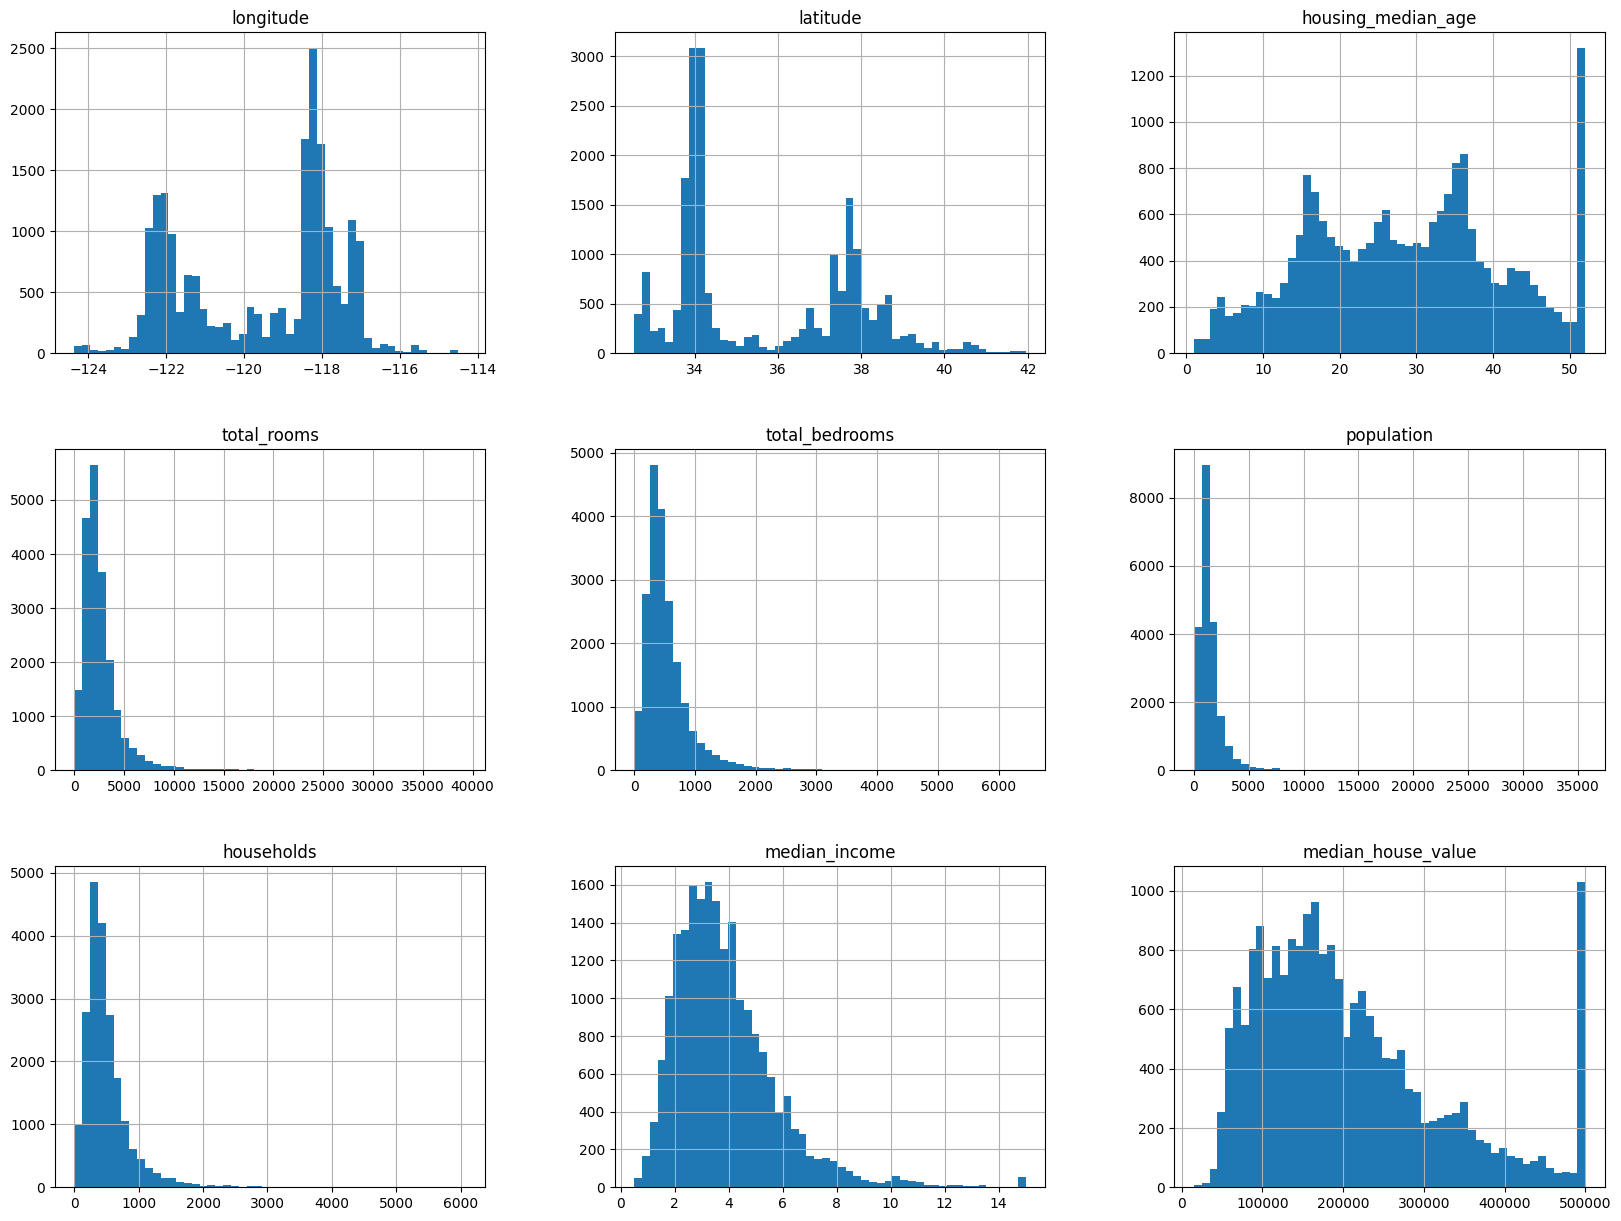

In [6]:
# Informações gerais sobre o dataset
data.info()

# Estatísticas descritivas
data.describe()

# Visualizar a distribuição de algumas variáveis
data.hist(bins=50, figsize=(20,15))
plt.show()


In [7]:
# Selecionar as colunas relevantes
features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
# Remover linhas com quaisquer valores ausentes nas features selecionadas
features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].dropna()

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Importar SimpleImputer
from sklearn.impute import SimpleImputer

# Selecionar as colunas relevantes
features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

# Criar um imputer para preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')  # Você pode usar outras estratégias como 'median'

# Ajustar o imputer aos seus dados e transformá-los
scaled_features = imputer.fit_transform(features)

# Normalizar os dados após a imputação
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_features)

In [10]:
# Treinar o modelo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Adicionar os rótulos dos clusters ao dataset original
data['Cluster'] = kmeans.labels_


          longitude   latitude  housing_median_age   total_rooms  \
Cluster                                                            
0       -118.021094  33.938307           30.724163   1947.307273   
1       -121.731678  37.986502           30.430705   2044.194001   
2       -118.886141  35.095820           12.202572  13779.051447   
3       -119.158443  35.184863           18.894630   5253.765282   

         total_bedrooms   population   households  median_income  \
Cluster                                                            
0            406.815680  1149.087015   383.182761       3.881825   
1            407.105249  1033.665051   377.853288       3.749922   
2           2635.287097  6782.771704  2384.389068       4.406561   
3           1084.231399  2781.555556   997.811888       4.089030   

         median_house_value  
Cluster                      
0             211988.494555  
1             194801.220199  
2             214747.295820  
3             220232.735900  


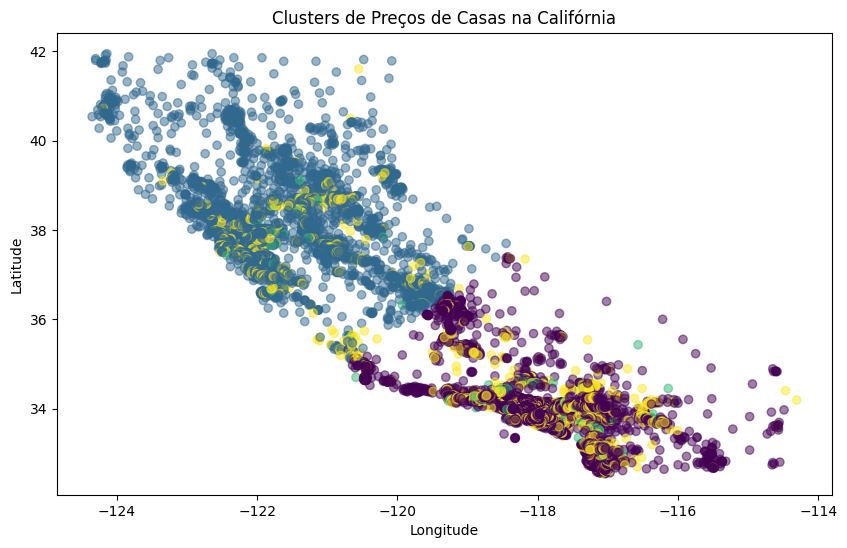

In [12]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# ... (seu código anterior para carregar e pré-processar os dados) ...

# Treinar o modelo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Adicionar os rótulos dos clusters ao dataset original
data['Cluster'] = kmeans.labels_

# Selecionar apenas colunas numéricas para calcular a média
numeric_data = data.select_dtypes(include=['number'])

# Estatísticas descritivas por cluster, considerando apenas colunas numéricas
cluster_analysis = numeric_data.groupby('Cluster').mean()
print(cluster_analysis)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Preços de Casas na Califórnia')
plt.show()

In [17]:
# Salvar o notebook como PDF
!jupyter nbconvert --to pdf Califórnia1990.ipynb


[NbConvertApp] WARNING | pattern 'Califórnia1990.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute


In [18]:
!dir

sample_data
